In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


### Load the data set

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Train set shape: {train_images.shape}")
print(f"Train set labels: {len(train_labels)}")

print(f"Test set shape: {test_images.shape}")
print(f"Test set labels: {len(test_labels)}")

11493376/11490434 [==============================] - 0s 0us/step
Train set shape: (60000, 28, 28)
Train set labels: 60000
Test set shape: (10000, 28, 28)
Test set labels: 10000


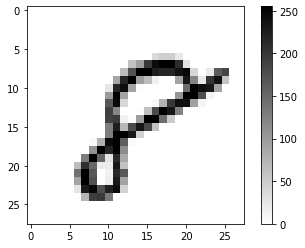

In [0]:
plt.figure()
plt.imshow(train_images[-1], cmap = "binary")
plt.colorbar()
plt.show()

### Standardize the dataset

In [0]:
train_images_std = train_images.reshape((60000, 28 * 28))
train_images_std = train_images_std.astype("float32") / 255

test_images_std = test_images.reshape((10000, 28 * 28))
test_images_std = test_images_std.astype("float32") / 255

train_labels_std = to_categorical(train_labels)
test_labels_std = to_categorical(test_labels)

print(train_labels[-1])
print(train_labels_std[-1])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Create and compile the model

In [0]:
network = keras.Sequential()

# Create our model
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(32, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [0]:
network.fit(train_images_std, train_labels_std, epochs=50)

test_loss, test_acc = network.evaluate(test_images_std, test_labels_std)

print(f"Test loss: {test_loss} Test accuracy: {test_acc}")

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2478 - accuracy: 0.2855
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9689 - accuracy: 0.5308
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4801 - accuracy: 0.6120
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1198 - accuracy: 0.7040
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8967 - accuracy: 0.7658
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7474 - accuracy: 0.8051
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6427 - accuracy: 0.8343
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5671 - accuracy: 0.8533
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5112 - accuracy: 0.8681
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.468

[[0.011 0.    0.008 0.    0.016 0.132 0.805 0.    0.025 0.003]]
Prediction: 6 Label: 5


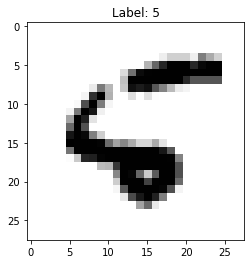

In [0]:
# make a prediction on a specific image from the test data
test_index = 8

input_image = test_images_std[test_index]
prediction = network.predict(np.array([input_image]))

print(prediction)

np.set_printoptions(precision=3, suppress= True)
print(f"Prediction: {np.argmax(prediction)} Label: {test_labels[test_index]}")

plt.title(f"Label: {test_labels[test_index]}")

plt.imshow(test_images[test_index], cmap="binary")